<a href="https://colab.research.google.com/github/Debugger-Dev/ML_models/blob/main/Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dataset Preparation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y=datasets.make_regression(n_samples=200,n_features=1,noise=20,random_state=4)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1000)

In [13]:
class LinearRegression:

  def __init__(self,lr=0.01,n_iters=1000): 
    self.lr=lr
    self.n_iters=n_iters   #no of iteration for gradient decent
    self.weight=None     #m
    self.bias=None       #c

  def fit(self,X,y):
    n_sample,n_feature=X_train.shape
    #initial weight and bias =0
    self.weight=np.zeros(n_feature)
    self.bias= 0 

    #gradient decent and learning rate
    for _ in range(self.n_iters):
      #y_pred= mx +c
      y_predicted=np.dot(X,self.weight) + self.bias
      

      #update the weight and bias by partial derivating wrt MSE
      dw = (1/n_sample) *2* np.dot(X.T , (y_predicted-y))
      db = (1/n_sample) *2* np.sum(y_predicted-y)

      #w=w-lr*w
      #b=b-lr*b
      self.weight -= self.lr*dw
      self.bias -= self.lr*db

  def predict(self,X):
    y_predicted=np.dot(X,self.weight)+ self.bias
    return y_predicted


In [14]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)

In [15]:
def mse(y_true,y_predicted):
  return np.mean((y_predicted-y_true)**2)

In [16]:
mse(y_test,predicted)

454.9431223696935

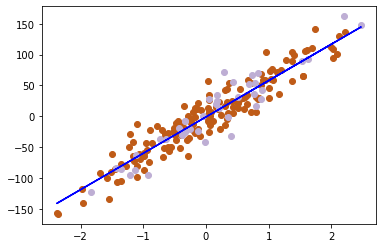

In [17]:
#plotting
y_plot_line=regressor.predict(X)
cmap=plt.get_cmap("Accent")
m1=plt.scatter(X_train,y_train,color=cmap(0.8))
m2=plt.scatter(X_test,y_test,color=cmap(0.2))
plt.plot(X,y_plot_line,color="Blue",label="Prediction")
plt.show()